In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

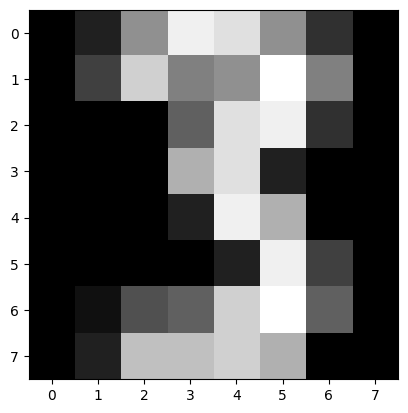

In [7]:
import matplotlib.pyplot as plt

X_image = X[13].reshape(8, 8)
plt.imshow(X_image, cmap="gray")

In [8]:
clf = MLPClassifier()

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

clf = MLPClassifier(random_state=42, max_iter=1000)

params={
    "mlpc__solver": ["lbfgs", "adam", "sgd"],
    "mlpc__alpha": 10.0 ** -np.arange(1, 7),
    "mlpc__hidden_layer_sizes": ((64, 32), (128, 64), (64, 32, 16), (128, 64, 32)),
    "mlpc__activation": ["relu", "tanh"]
}

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("mlpc", clf)
])

clf_gs = GridSearchCV(pipeline, params, n_jobs=-1, cv=3)

In [22]:
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlpc',
                                        MLPClassifier(max_iter=1000,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'mlpc__activation': ['relu', 'tanh'],
                         'mlpc__alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'mlpc__hidden_layer_sizes': ((64, 32), (128, 64),
                                                      (64, 32, 16),
                                                      (128, 64, 32)),
                         'mlpc__solver': ['lbfgs', 'adam', 'sgd']})

In [23]:
score = clf_gs.score(X_test, y_test)
print(score)

0.975


In [24]:
print(clf_gs.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlpc',
                 MLPClassifier(alpha=np.float64(0.1),
                               hidden_layer_sizes=(128, 64), max_iter=1000,
                               random_state=42, solver='lbfgs'))])
